In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
import yfinance as yf
import pandas as pd

# Define the assets
assets = ['TSLA', 'BND', 'SPY']

# Fetch data for each asset from 01-Jan-2015 to 31-Jan-2025
data = {asset: yf.download(asset, start="2015-01-01", end="2025-01-31") for asset in assets}

# Display sample data for TSLA
print(data['TSLA'].head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


<Figure size 1000x600 with 0 Axes>

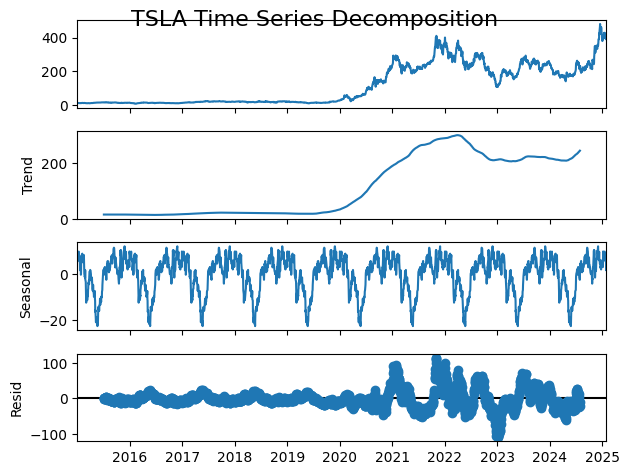

<Figure size 1000x600 with 0 Axes>

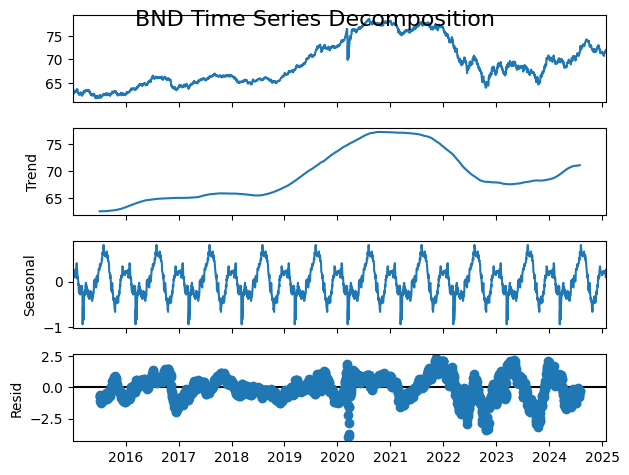

<Figure size 1000x600 with 0 Axes>

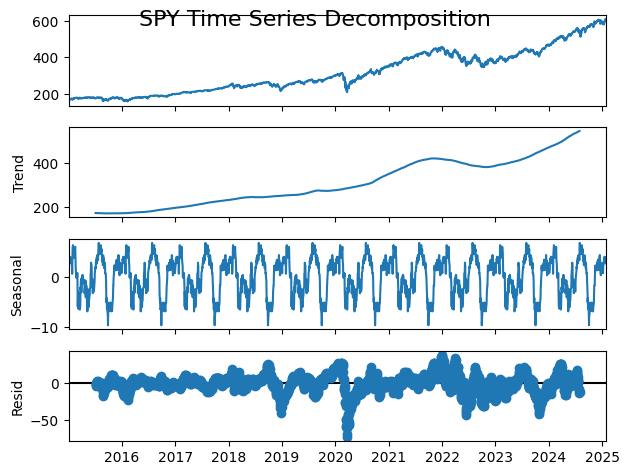

In [4]:


for asset in assets:
    plt.figure(figsize=(10,6))
    decomposition = sm.tsa.seasonal_decompose(data[asset]['Close'], model='additive', period=252)  # 252 trading days per year
    decomposition.plot()
    plt.suptitle(f'{asset} Time Series Decomposition', fontsize=16)
    plt.show()


ARIMA model

c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10

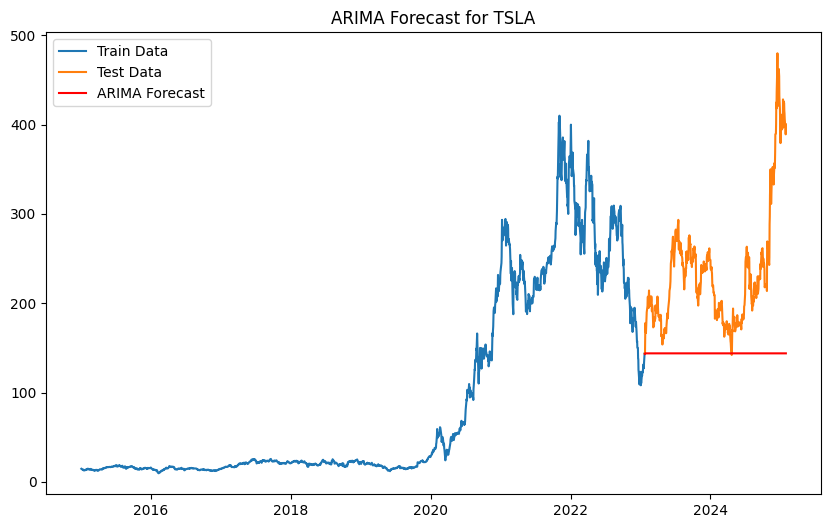

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Train-Test Split
train_data, test_data = train_test_split(data['TSLA']['Close'], test_size=0.2, shuffle=False)

# ARIMA Model
arima_model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q) can be tuned
arima_model_fit = arima_model.fit()

# Forecasting
forecast = arima_model_fit.forecast(steps=len(test_data))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for TSLA')
plt.legend()
plt.show()


SARIMA model

c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investment

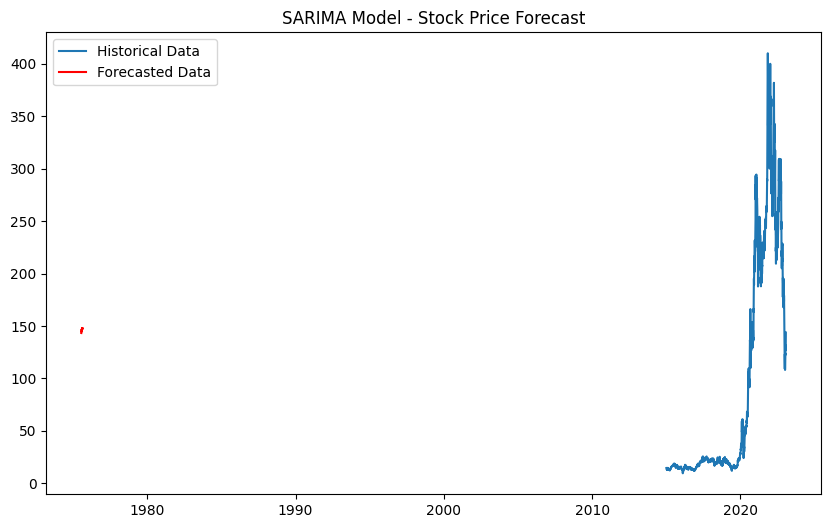

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Adjusted SARIMA Model - Non-seasonal AR(5), seasonal AR(1) with different seasonal lag
sarima_model = SARIMAX(train_data, 
                       order=(5, 1, 0),  # Non-seasonal AR(5) model
                       seasonal_order=(1, 1, 1, 7))  # Seasonal AR(1) model, seasonality of 7 periods
sarima_model_fit = sarima_model.fit()

# Forecasting
forecast_steps = 30  # Number of days to forecast
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Plotting the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TSLA'], label='Historical Data')
plt.plot(forecast.predicted_mean.index, forecast_values, label='Forecasted Data', color='red')
plt.title('SARIMA Model - Stock Price Forecast')
plt.legend()
plt.show()


LSTM model

c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0134
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 7.1149e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.4157e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.7221e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.6115e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.1895e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.6732e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.2322e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.0978e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.4803e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.5605e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 3.1660e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.9075e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 3.5118e-04
Epoch 15/20
62/62 ━

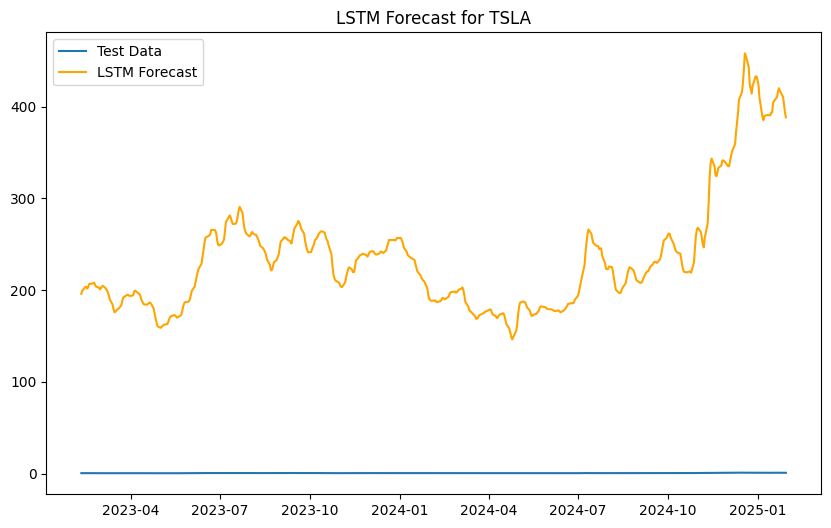

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['TSLA']['Close'].values.reshape(-1, 1))

# Create the dataset for LSTM (using 60 previous days to predict the next day)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Forecasting
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data['TSLA'].index[-len(y_test):], y_test, label='Test Data')
plt.plot(data['TSLA'].index[-len(lstm_forecast):], lstm_forecast, label='LSTM Forecast', color='orange')
plt.title('LSTM Forecast for TSLA')
plt.legend()
plt.show()
